# 图像形态学概要

形态学，是图像处理中应用最为广泛的技术之一，主要用于从图像中提取对表达和描绘区域形状有意义的图像分量，使后续的识别工作能够抓住目标对象最为本质的形状特征，如边界和连通区域等。

结构元素

- 设有两幅图像 B，X
- 若 X（大的图像）是被处理的对象，而 B（小的图像） 是用来处理 X 的，则称 B 为结构元素(structure element)，又被形象地称做刷子。
- 结构元素通常都是一些比较小的图像。

腐蚀和膨胀

- 图像的膨胀（Dilation）和腐蚀（Erosion）是两种基本的形态学运算，其中
- 膨胀类似于“领域扩张”，将图像中的白色部分进行扩张，其运行结果图比原图的白色区域更大；
- 腐蚀类似于“领域被蚕食”，将图像中白色部分进行缩减细化，其运行结果图比原图的白色区域更小。



# 图像腐蚀

针对灰度图像

腐蚀的运算符是 “－”，其定义如下：
$$
A-B=\{x|B_x\subseteq A\}
$$
该公式表示图像 A 用卷积模板 B 来进行腐蚀处理，通过模板 B 与图像 A 进行卷积计算，得出 B 覆盖区域的像素点最小值，并用这个最小值来替代参考点的像素值。

![](assets/erosion1.png)

把结构元素 B 平移 a 后得到 Ba，若 Ba 包含于X，我们记下这个 a 点，所有满足上述条件的 a 点组成的集合称做 X 被 B 腐蚀(Erosion)的结果。如下图所示。

![](assets/erosion2.png)
其中 X 是被处理的对象， B 是结构元素。对于任意一个在阴影部分的点 a， Ba 包含于 X，所以 X 被 B 腐蚀的结果就是那个阴影部分。阴影部分在 X 的范围之内，且比 X 小，就象 X 被剥掉了一层似的。

![](assets/erosion3.png)

腐蚀的方法是，拿 B 的中心点和 X 上的点一个一个地对比，如果 B 上的所有点都在 X 的范围内，则该点保留，否则将该点去掉；右边是腐蚀后的结果。可以看出，它仍在原来 X 的范围内，且比X 包含的点要少，就象 X 被腐蚀掉了一层。

函数： `cv2.erode(src,kernel,anchor,iterations)`

- 参数1： `src`，输入的图像。应该是一个二进制图像（通常是黑白图像）。
- 参数2： `kernel`，用于侵蚀操作的结构元素。结构元素决定了侵蚀的方式。如果不指定，默认是一个 3x3 的矩形。结构元素可以使用 `cv2.getStructuringElement` 函数来创建。
- 参数3： `anchor`，结构元素的锚点位置。默认值是 (-1, -1)，表示结构元素的中心点。如果你有特定的需求，可以指定其他位置。
- 参数4： `iterations`，侵蚀操作的次数。默认值是 1，但可以通过指定更大的数字来多次侵蚀图像。


腐蚀后的图像

![](assets/erosion4.png)

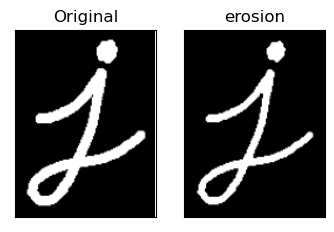

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
img = cv2.imread('./images2/morphology.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion), plt.title('erosion')
plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#kernel = np.ones((5,5),np.uint8)
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
print(kernel)

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


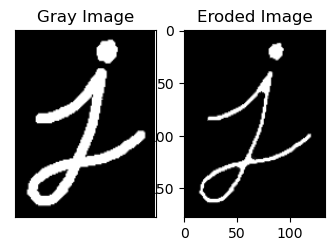

In [1]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

image = cv2.imread("./images2/morphology.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Gray Image')
plt.xticks([]), plt.yticks([])

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
eroded = cv2.erode(gray.copy(), kernel, 10)

plt.subplot(122), plt.imshow(eroded, cmap='gray'), plt.title('Eroded Image')
plt.show()

**选讲**

`cv2.erode()` 中其他参数
- `borderType`: 用于扩展图像边缘的像素复制方法。这对于处理图像边缘上的像素很有用。
- `borderValue`: 当 `borderType` 为 `BORDER_CONSTANT` 时，该值用作边界的像素值。


在形态学操作（如侵蚀、膨胀等）中，处理图像边缘是一个挑战，因为结构元素可能超出图像的边界。为了解决这个问题，OpenCV 提供了边界类型 `borderType` 和边界值 `borderValue` 这两个参数。

1. **borderType**: 这是一个标志，用于确定如何处理图像边缘。主要的标志有：

   - `cv2.BORDER_CONSTANT`: 添加一个固定值的颜色边框。要使用这个标志，你还需要定义一个 `borderValue`。
   - `cv2.BORDER_REFLECT`: 边框将是图像本身的镜像。例如: fedcba|abcdefgh|hgfedcb
   - `cv2.BORDER_REFLECT_101` 或 `cv2.BORDER_DEFAULT`: 类似于上述反射，但略有不同。例如: gfedcb|abcdefgh|gfedcba
   - `cv2.BORDER_REPLICATE`: 最后一个元素复制。例如: aaaaaa|abcdefgh|hhhhhhh
   - 还有其他选项，但上述几个是最常用的。

2. **borderValue**: 当 `borderType` 设置为 `cv2.BORDER_CONSTANT` 时使用。它定义了添加的颜色边框的值。


# 图像膨胀

膨胀(dilation)可以看做是腐蚀的对偶运算，其定义是：把结构元素 B 平移 a 后得到 Ba，若 Ba 击中 X，我们记下这个 a 点。所有满足上述条件的 a 点组成的集合称做 X 被 B 膨胀的结果。如下图所示。

![](assets/dilation1.png)

其中 X 是被处理的对象， B 是结构元素，对于任意一个在阴影部分的点 a， Ba 击中 X，所以 X 被 B 膨胀的结果就是那个阴影部分。阴影部分包括 X 的所有范围，就像 X 膨胀了一圈似的。

---

需要说明：若是灰度图像处理时，是寻找结构元素中覆盖目标图像的最大值，赋给结构元素原点位置。（而图中所展示的是最简单的二值图情况下变化）

<img src="assets/dilation2.png" width="800"/>

膨胀时：只要结构元素与目标区域有交集，就保留结构元素的<u>中心点覆盖位置</u>

膨胀后的图像

![](assets/dilation3.png)


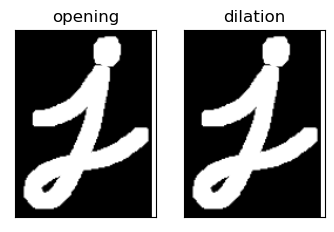

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
img = cv2.imread('./images2/morphology.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#kernel = np.ones((3,),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

dilation = cv2.dilate(img, kernel, iterations=1)
kernel1 = np.ones((7, 7), np.uint8)
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel1)
plt.subplot(121), plt.imshow(opening), plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilation), plt.title('dilation')
plt.xticks([]), plt.yticks([])
plt.show()

# 开运算

开运算 = 先腐蚀运算，再膨胀运算（看上去把细微连在一起的两块目标分开了），它对于消除噪音很有用，开运算的效果图如下图所示：

![](assets/open.png)

开运算总结：

1. 开运算能够除去孤立的小点，毛刺和小桥，而总的位置和形状不变。
2. 开运算是一个基于几何运算的滤波器。
3. 结构元素大小的不同将导致滤波效果的不同。
4. 不同的结构元素的选择导致了不同的分割，即提取出不同的特征。

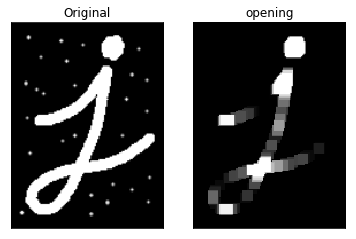

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images2/open.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#kernel = np.ones((5,5),np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(opening), plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

# 闭运算

闭运算 = 先膨胀运算，再腐蚀运算（看上去将两个细微连接的图块封闭在一起），在关闭前景对象内部的小孔或对象上的小黑点时很有用。

闭运算的效果图如图所示：

![](assets/close.png)

闭运算总结：

1. 闭运算能够填平小湖（即小孔），弥合小裂缝，而总的位置和形状不变。
2. 闭运算是通过填充图像的凹角来滤波图像的。
3. 结构元素大小的不同将导致滤波效果的不同。
4. 不同结构元素的选择导致了不同的分割。

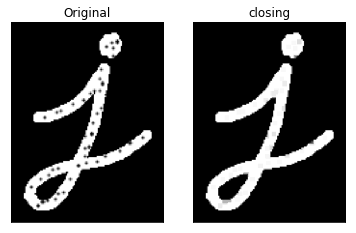

In [15]:
import cv2 as cv
import numpy as np

img = cv.imread('./images2/close.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#kernel = np.ones((5,5),np.uint8)
kernel = np.ones((7, 7), np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing), plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

# 形态学梯度

形态学梯度（Gradient）：

- 基础梯度：基础梯度是用膨胀后的图像减去腐蚀后的图像得到差值图像，也是OpenCV中支持的计算形态学梯度的方法，而此方法得到梯度有称为基本梯度。
- 内部梯度：是用原图像减去腐蚀之后的图像得到差值图像，称为图像的内部梯度。
- 外部梯度：图像膨胀之后再减去原来的图像得到的差值图像，称为图像的外部梯度。


这是图像膨胀和腐蚀之间的区别。结果将看起来像对象的轮廓。

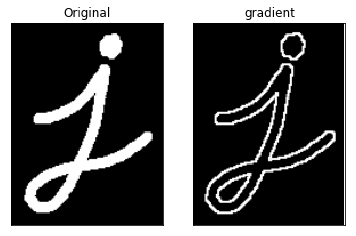

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images2/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((3, 3), np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gradient), plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

# 顶帽和黑帽
- 顶帽（Top Hat）：原图像与开运算图的差值，突出原图像中比周围亮的区域
- 黑帽（Black Hat）：闭运算图像与原图像的差值，突出原图像中比周围暗的区域

顶帽：它是原图像和开运算之后图像之差。下面的示例针对9x9内核完成。

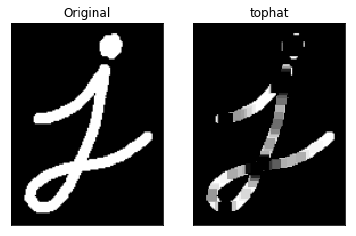

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images2/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((9, 9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat), plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

黑帽：这是输入图像和图像闭运算之差。

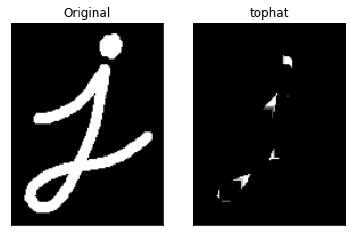

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images2/morphology.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
kernel = np.ones((9, 9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat), plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

# 结构元素（选讲）

In [19]:
# 矩形内核
cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
a = [[1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1]]
print(a)

[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]


In [20]:
# 椭圆内核
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

这段代码是使用 OpenCV（一个广泛使用的计算机视觉库）来生成一个结构化元素。在这里，你问的是关于形态学操作中的结构元素或内核的意义。让我们详细解释一下。

1. **形态学操作 (Morphological Operations)**:
形态学操作是基于图像形状进行的简单操作，常在二进制图像上使用。这些操作需要两个输入，一个是原始图像，另一个是称为结构化元素或内核的决定操作性质的形状。

2. **结构化元素 (Structuring Element)**:
结构化元素是一个用于定义形态学操作性质的小矩阵。例如，形态学操作可以是扩张或腐蚀。扩张会"增大"图像中的白色区域（或前景），而腐蚀会"减少"它。

3. **代码解释**:
```python
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
```
- `cv.MORPH_ELLIPSE`: 这表示你想要一个椭圆形（或圆形，因为5x5的情况下它是一个圆）的结构化元素。
- `(5, 5)`: 这是结构化元素的大小。在这里，它是一个5x5的矩阵，对于`MORPH_ELLIPSE`，它将给出一个填充的圆形。

生成的结构化元素看起来大约是这样的：

```
0 0 1 0 0
0 1 1 1 0
1 1 1 1 1
0 1 1 1 0
0 0 1 0 0
```

其中"1"表示椭圆的像素，"0"表示背景。

这个结构化元素可以用于形态学操作，如腐蚀或扩张。例如，使用这个5x5的圆形结构化元素进行腐蚀操作，会删除小于该圆形大小的所有白色区域。